In [218]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [219]:
from sklearn import datasets
boston = datasets.load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

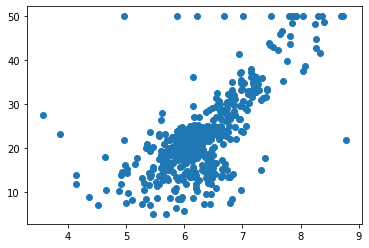

In [220]:
x = boston.data[:,5]# 只是用“RM”属性
y = boston.target
plt.scatter(x,y)
plt.show()

In [221]:
x.shape

(506,)

In [222]:
#y= y[:,np.newaxis]

In [223]:
y.shape

(506,)

In [224]:
#爆表的的数值
np.max(y)

50.0

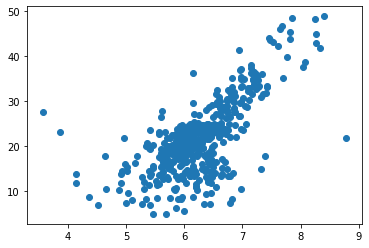

In [225]:
#删除图中靠上的数据
x = x[y<50.0]
y = y[y<50.0]
plt.scatter(x,y)
plt.show()

In [226]:
x.shape

(490,)

In [228]:
def linear_loss(X,y,w,b):
    num_train = X.shape[0]
    num_feature = X.shape[1]
    
    #y_hat = y - np.dot(X,w) + b 这里是粗心重大错误啊
    y_hat =np.dot(X,w) + b
    
    loss = np.sum((y-y_hat)**2)/num_train
    
    #dw = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
    
    dw = np.dot(X.T,(y_hat - y))/num_train
    db = np.sum((y_hat-y))/num_train
    
    return y_hat,loss,dw,db

In [229]:
def init_params(dims):
    w = np.zeros((dims,1))#双层括号注意
    b = 0
    return w,b

In [230]:
def linear_train(X,y,learning_rate,epochs):
    w,b = init_params(X.shape[1])
    loss_list = []
    
    for i in range(1,epochs):
        y_hat,loss,dw,db = linear_loss(X,y,w,b)
        loss_list.append(loss)
        
        w += -learning_rate*dw
        b += -learning_rate*db
        
        if i%10000 == 0:
            print('epch %d loss %f'%(i,loss))
        params={
            'w':w,
            'b':b
        }
        grads = {
            'dw':dw,
            'db':db
        }
    return loss_list,loss,params,grads

In [231]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
#from sklearn.utils import shuffle

In [235]:
#打乱数据
#X,y = shuffle(x,y,random_state = 13)
#X = X.astype(np.float32)

#划分数据
offset = int(X.shape[0]*0.9)
X_train,y_train = X[:offset],y[:offset]
X_test,y_test = X[offset:],y[offset:]
X_train = X_train.reshape((-1,1))
X_test = X_test.reshape((-1,1))
y_train = y_train.reshape((-1,1))######这里相当于添加维度相当重要
y_test = y_test.reshape((-1,1))
print('X_train=',X_train.shape)
print('X_test=',X_test.shape)
print('y_train=',y_train.shape)
print('y_test=',y_test.shape) 

X_train= (441, 1)
X_test= (49, 1)
y_train= (441, 1)
y_test= (49, 1)


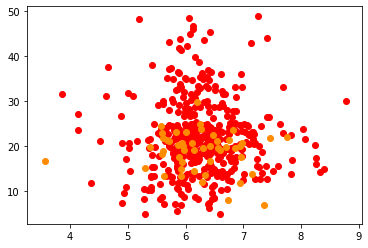

In [251]:
plt.scatter(X_train,y_train,color='red')
plt.scatter(X_test,y_test,color='darkorange')

In [238]:
loss_list,loss,params,grads = linear_train(X_train,y_train,0.001,100000)

epch 10000 loss 69.979479
epch 20000 loss 69.161745
epch 30000 loss 68.497846
epch 40000 loss 67.958844
epch 50000 loss 67.521241
epch 60000 loss 67.165962
epch 70000 loss 66.877520
epch 80000 loss 66.643340
epch 90000 loss 66.453216


In [239]:
print(params)

{'w': array([[1.09259202]]), 'b': 15.027390747622924}


In [240]:
params['w']

array([[1.09259202]])

In [241]:
w = float(params['w'])
b = float(params['b'])
x_points = np.linspace(4,9,10)
print('coef %f interception %f '%(w,b))
y_ = w*x_points + b

coef 1.092592 interception 15.027391 


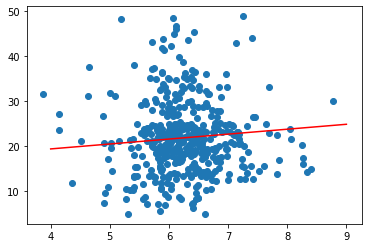

In [242]:
plt.scatter(X_train,y_train)
plt.plot(x_points,y_,'-r',label='y=w*x+b')

plt.show()